In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy

Might want to read http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/.

## Reading in a single data file

Data obtained from:
- https://www.whitehouse.gov/omb/budget/Historicals

In [5]:
# read in file
t31_super_fxn = pd.read_excel('../data/hist03z1.xls', 
                              skiprows = 1, index_col = 'Superfunction and Function',)

# select columns 
t31_super_fxn = t31_super_fxn.loc[['Physical resources','Energy','Natural Resources and Environment',
                  'Commerce and Housing Credit','Transportation','Community and Regional Development']]
t31_super_fxn = t31_super_fxn.T

# rename columns
t31_super_fxn.columns = ['total_phys_res','pct_outlay','pct_gdp','energy','nat_res',
                        'comm_housing','transp','comm_reg_dev']

# filter out estimates
t31_super_fxn = t31_super_fxn[t31_super_fxn.index <= '2015']

t31_super_fxn.head()

,total_phys_res,pct_outlay,pct_gdp,energy,nat_res,comm_housing,transp,comm_reg_dev
1940,2312,24.4,2.4,88,997,550,392,285
1941,1782,13.1,1.5,91,817,398,353,123
1942,3892,11.1,2.6,156,819,1521,1283,113
1943,6433,8.2,3.5,116,726,2151,3220,219
1944,5471,6,2.6,65,642,624,3901,238


Somewhere in here, need to add Kate's data

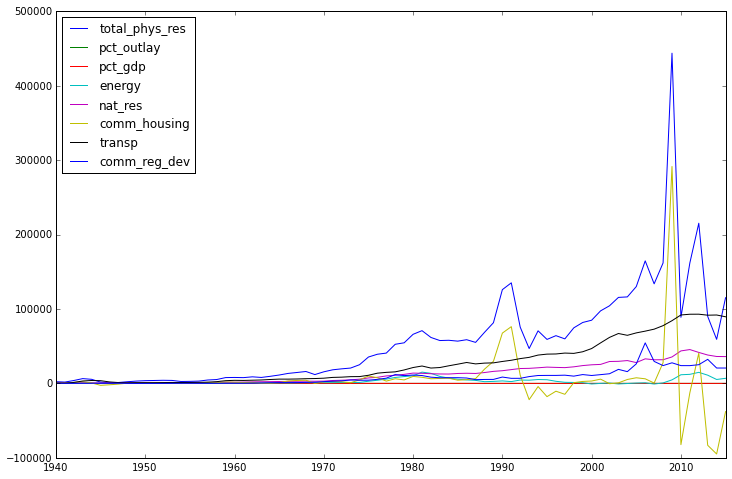

In [6]:
t31_super_fxn.plot(figsize=(12,8))

## Testing out statsmodels tsa module

Using a single data column in the data

In [7]:
df1 = copy.deepcopy(t31_super_fxn.T).T
df1.head()

,total_phys_res,pct_outlay,pct_gdp,energy,nat_res,comm_housing,transp,comm_reg_dev
1940,2312,24.4,2.4,88,997,550,392,285
1941,1782,13.1,1.5,91,817,398,353,123
1942,3892,11.1,2.6,156,819,1521,1283,113
1943,6433,8.2,3.5,116,726,2151,3220,219
1944,5471,6,2.6,65,642,624,3901,238


In [8]:
df1.index = pd.to_datetime(df1.index, format='%Y')
df1.head()

,total_phys_res,pct_outlay,pct_gdp,energy,nat_res,comm_housing,transp,comm_reg_dev
1940-01-01,2312,24.4,2.4,88,997,550,392,285
1941-01-01,1782,13.1,1.5,91,817,398,353,123
1942-01-01,3892,11.1,2.6,156,819,1521,1283,113
1943-01-01,6433,8.2,3.5,116,726,2151,3220,219
1944-01-01,5471,6,2.6,65,642,624,3901,238


In [9]:
# time series tools
from statsmodels.tsa.stattools import acf, pacf

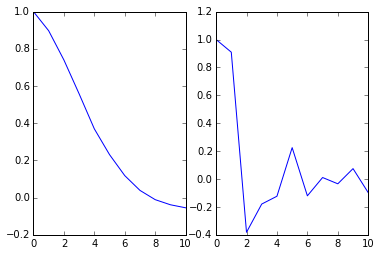

In [10]:
# analyze autocorrelation for spending

lag_acf = acf(df1.energy, nlags = 10)
lag_pacf = pacf(df1.energy, nlags = 10)

plt.subplot(121)
plt.plot(lag_acf)

plt.subplot(122)
plt.plot(lag_pacf)

In [11]:
t31_super_fxn.to_csv('../data/infrastructure_spending.csv')

Also see http://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

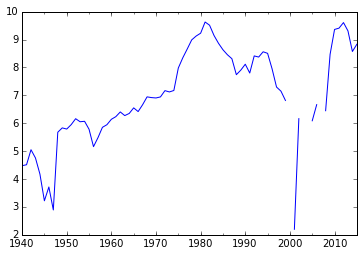

In [13]:
(df1.energy.apply(lambda x: np.log(x))).plot()

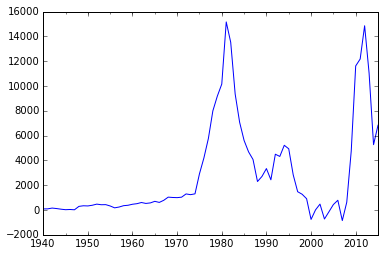

In [14]:
df1.energy.plot()

In [21]:
from statsmodels.tsa.arima_model import ARMA

In [22]:
model1 = ARMA(df1.energy, order=(2,0,2))
results1 = model1.fit(disp=-1)

See https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ for pointers

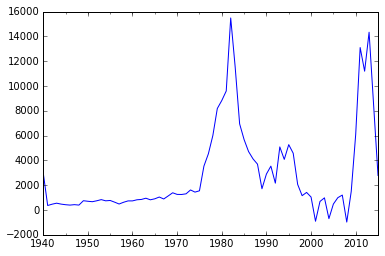

In [24]:
results1.fittedvalues.plot()